# Lab 1

## Non-standardized

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv"
df = pd.read_csv(data_url)
df

,Midterm mark,Final mark
0,32.5,31.7
1,53.4,68.8
2,61.5,62.6
3,47.5,71.5
4,59.8,87.2
...,...,...
95,50.0,81.5
96,49.2,72.1
97,50.0,85.2
98,48.1,66.2


In [32]:
# Extract features and target
X = df.iloc[:, 0].values  # Midterm marks
y = df.iloc[:, 1].values  # Final

In [33]:
# Standardization function
def standardize(X):
    return (X - np.mean(X)) / np.std(X)

# (Error) Cost function
def compute_cost(m, b, X, y):
    N = len(y)
    error = np.sum((y - (m * X + b)) ** 2) / N
    return error

# Gradient descent function
def gradient_descent(X, y, m, b, alpha, iterations):
    N = len(y)
    cost_history = []

    for _ in range(iterations):
        y_pred = m * X + b
        dm = (-2/N) * np.sum(X * (y - y_pred))
        db = (-2/N) * np.sum(y - y_pred)
        m -= alpha * dm
        b -= alpha * db
        cost_history.append(compute_cost(m, b, X, y))

    return m, b, cost_history

In [34]:
# Initialize parameters
m, b, alpha = -0.5, 0, 0.0001
# Without standardization
m_final, b_final, cost_hist = gradient_descent(X, y, m, b, alpha, 100)

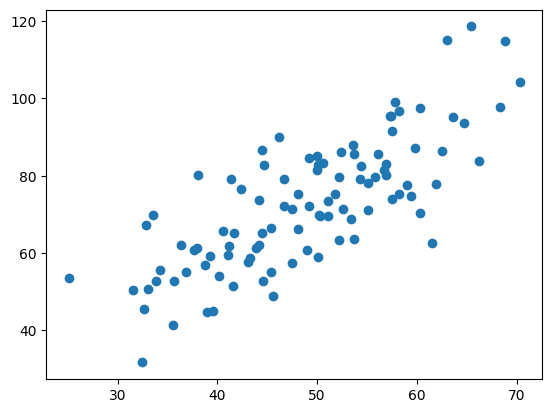

In [35]:
# Initial Data Plot
X = df['Midterm mark']
y = df['Final mark']

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

plt.scatter(X,y)
plt.show()

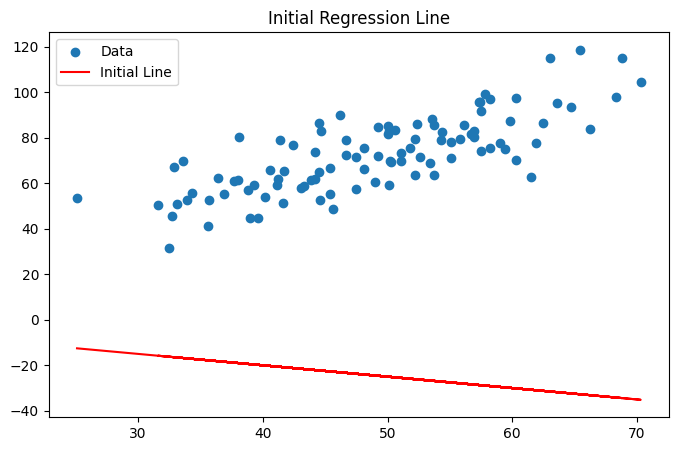

Final values: m = -0.5, b = 0


In [36]:
# Plot initial regression line
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data')
plt.plot(X, m * X + b, color='red', label='Initial Line')
plt.legend()
plt.title("Initial Regression Line")
plt.show()

# Print final values of m, b, and alpha
print(f'Final values: m = {m}, b = {b}')

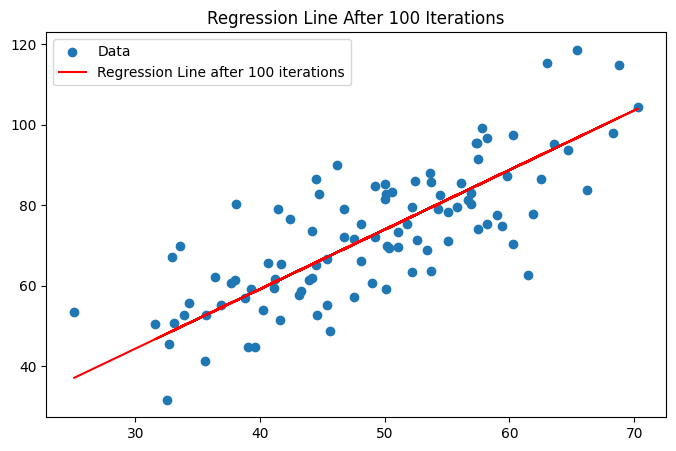

Final values: m = 1.4785727560143909, b = 0.04490536397288713


In [37]:
# Plot regression line after 100 iterations
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data')
plt.plot(X, m_final * X + b_final, color='red', label='Regression Line after 100 iterations')
plt.legend()
plt.title("Regression Line After 100 Iterations")
plt.show()

# Print final values of m, b, and alpha
print(f'Final values: m = {m_final}, b = {b_final}')

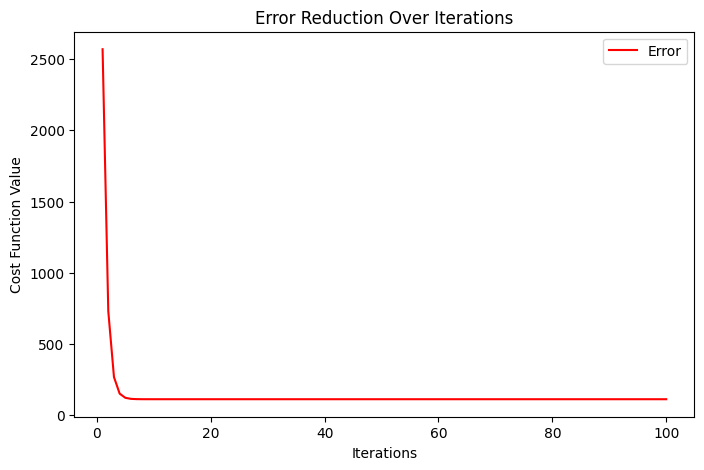

In [38]:
# Plot error reduction
t = np.arange(1, 101)
plt.figure(figsize=(8,5))
plt.plot(t, cost_hist,color="red", label='Error')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Error Reduction Over Iterations")
plt.legend()
plt.show()

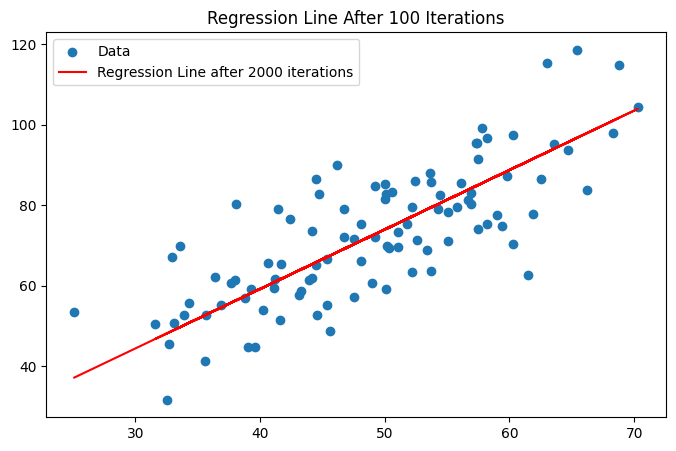

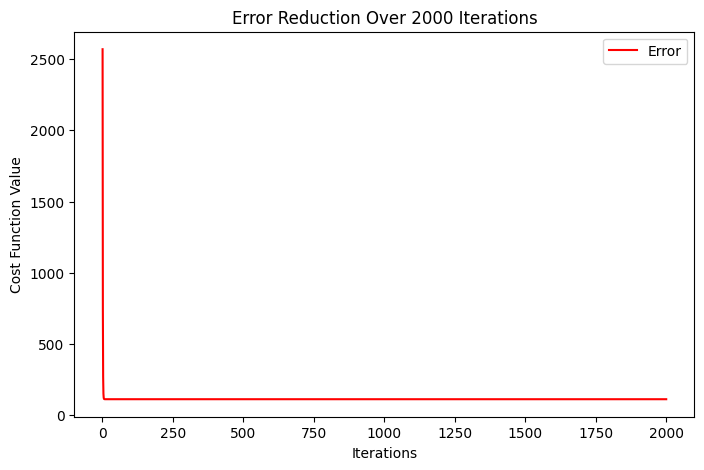

Final values: m = 1.4763433036607632, b = 0.1583379070844271


In [39]:
# Run for 2000 iterations
m_final, b_final, cost_hist = gradient_descent(X, y, m, b, alpha, 2000)

# Plot regression line after 2000 iterations
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data')
plt.plot(X, m_final * X + b_final, color='red', label='Regression Line after 2000 iterations')
plt.legend()
plt.title("Regression Line After 2000 Iterations")
plt.show()

# Plot error reduction for 2000 iterations
t = np.arange(1, 2001)
plt.figure(figsize=(8,5))
plt.plot(t, cost_hist,color="red", label='Error')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Error Reduction Over 2000 Iterations")
plt.legend()
plt.show()

# Print final values of m, b, and alpha
print(f'Final values: m = {m_final}, b = {b_final}')

### Sklearning

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv"
df = pd.read_csv(data_url)

# Extract features and target
X = df.iloc[:, 0].values.reshape(-1, 1)  # Midterm marks
y = df.iloc[:, 1].values.reshape(-1, 1)  # Final marks


The score of the model is: 0.5982684385776686.
The coef of the model is: 1.321992317252377.
The intercept of the model is: 8.01157813964086.


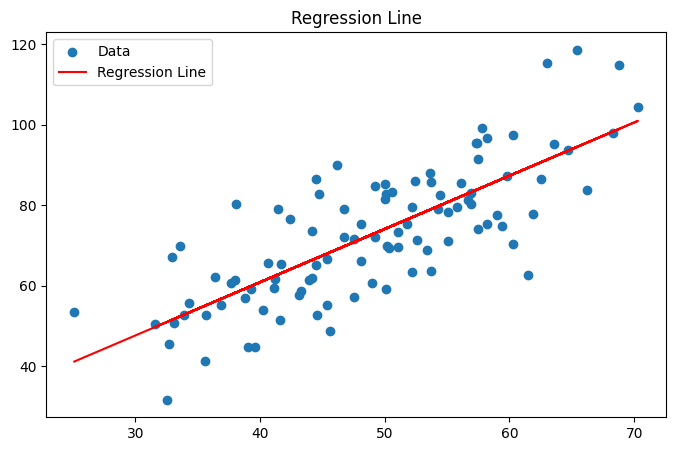

In [41]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get parameters
m = model.coef_[0][0]
b = model.intercept_[0]
model_score = model.score(X, y)

log_message = f'The score of the model is: {model_score}.'
print(log_message)

log_message = f'The coef of the model is: {m}.'
print(log_message)

log_message = f'The intercept of the model is: {b}.'
print(log_message)
# Plot initial regression line
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.legend()
plt.title("Regression Line")
plt.show()

## Standardized

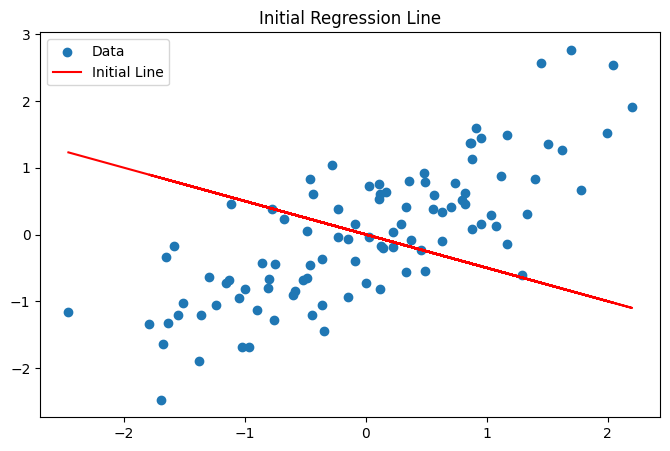

Final values: m = -0.4747809463889036, b = -2.3439028495886304e-18


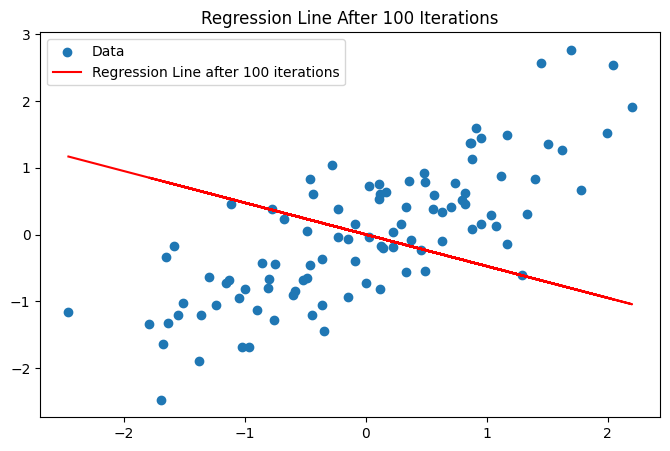

Final values: m = -0.4747809463889036, b = -2.3439028495886304e-18


In [42]:
# Initialize parameters
m, b, alpha = -0.5, 0, 0.0001

# Repeat with Standardization
X_std = standardize(X)
Y_std = standardize(y)

m_final_std, b_final_std, cost_hist_std = gradient_descent(X_std, Y_std, m, b, alpha, 100)

# Plot initial regression line
plt.figure(figsize=(8,5))
plt.scatter(X_std, Y_std, label='Data')
plt.plot(X_std, m * X_std + b, color='red', label='Initial Line')
plt.legend()
plt.title("Initial Regression Line")
plt.show()

# Print final values of m, b, and alpha
print(f'Final values: m = {m_final_std}, b = {b_final_std}')

# Plot regression line after 100 iterations
plt.figure(figsize=(8,5))
plt.scatter(X_std, Y_std, label='Data')
plt.plot(X_std, m_final_std * X_std + b_final_std, color='red', label='Regression Line after 100 iterations')
plt.legend()
plt.title("Regression Line After 100 Iterations")
plt.show()

# Print final values of m, b, and alpha
print(f'Final values: m = {m_final_std}, b = {b_final_std}')

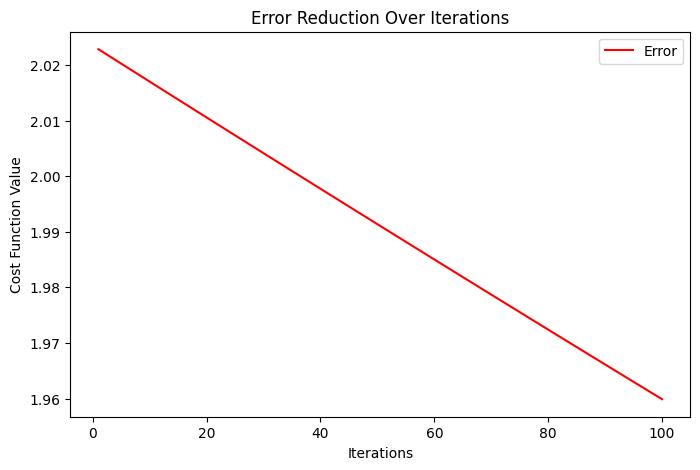

In [43]:
# Plot error reduction
t = np.arange(1, 101)
plt.figure(figsize=(8,5))
plt.plot(t, cost_hist_std,color="red", label='Error')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Error Reduction Over Iterations")
plt.legend()
plt.show()

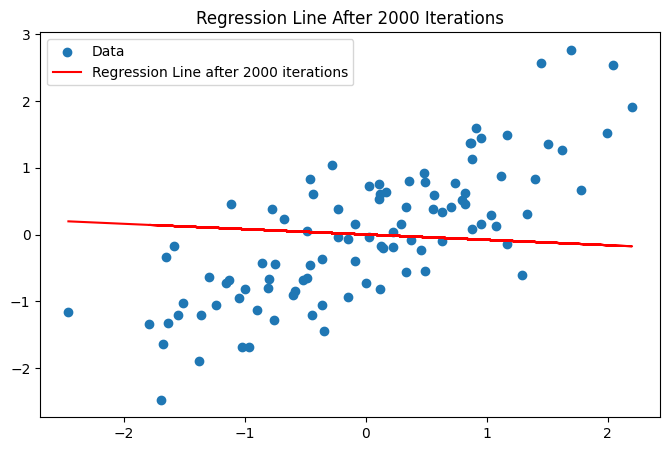

Final values: m = -0.0801256348663769, b = -1.8240964294591347e-17


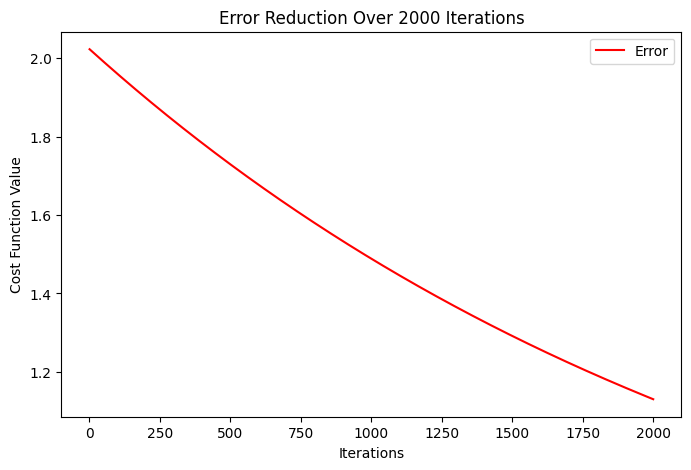

In [44]:
# Plot regression line after 2000 iterations
m_final_std, b_final_std, cost_hist_std = gradient_descent(X_std, Y_std, m, b, alpha, 2000)

# Plot regression line after 2000 iterations
plt.figure(figsize=(8,5))
plt.scatter(X_std, Y_std, label='Data')
plt.plot(X_std, m_final_std * X_std + b_final_std, color='red', label='Regression Line after 2000 iterations')
plt.legend()
plt.title("Regression Line After 2000 Iterations")
plt.show()

# Print final values of m, b, and alpha
print(f'Final values: m = {m_final_std}, b = {b_final_std}')

# Plot error reduction for 2000 iterations
t = np.arange(1, 2001)
plt.figure(figsize=(8,5))
plt.plot(t, cost_hist_std,color="red", label='Error')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Error Reduction Over 2000 Iterations")
plt.legend()
plt.show()

### Sklearning

The score of the model is: 0.5982684385776686.
The coef of the model is: [0.77347814].
The intercept of the model is: 2.5515431945611573e-16.


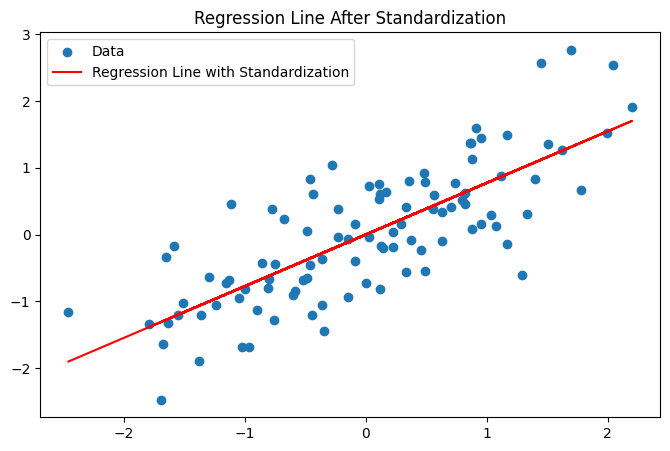

In [45]:
# Standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
Y_std = scaler.fit_transform(y)

# Train Linear Regression model with standardized data
model_std = LinearRegression()
model_std.fit(X_std, Y_std)


# Get parameters
m_std = model_std.coef_[0]
b_std = model_std.intercept_[0]
model_score = model_std.score(X_std, Y_std)

log_message = f'The score of the model is: {model_score}.'
print(log_message)

log_message = f'The coef of the model is: {m_std}.'
print(log_message)

log_message = f'The intercept of the model is: {b_std}.'
print(log_message)

# Plot standardized regression line
plt.figure(figsize=(8,5))
plt.scatter(X_std, Y_std, label='Data')
plt.plot(X_std, model_std.predict(X_std), color='red', label='Regression Line with Standardization')
plt.legend()
plt.title("Regression Line After Standardization")
plt.show()


## Discussion Questions

### Question 1

<ipython-input-33-2e0aa0c0da09>:8: RuntimeWarning: overflow encountered in square
  error = np.sum((y - (m * X + b)) ** 2) / N


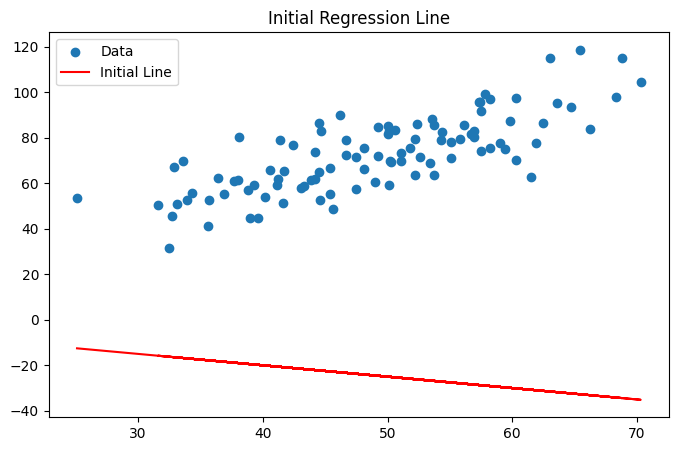

Final values: m = -0.5, b = 0


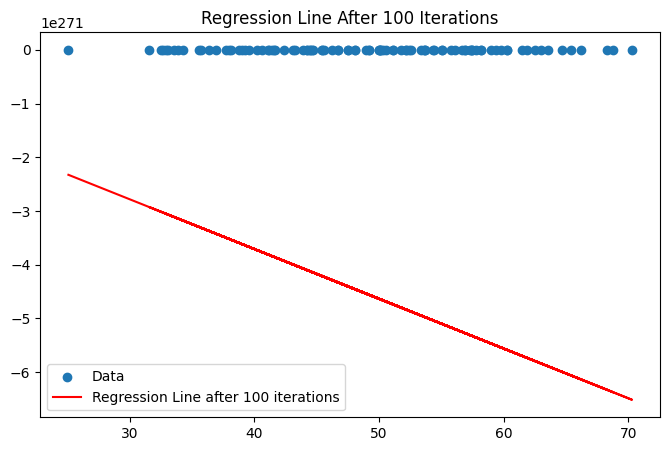

Final values: m = -9.26369527023025e+269, b = -1.820726808813388e+268


In [46]:

# Initialize parameters
m, b, alpha = -0.5, 0, 0.1

# Without standardization
m_final, b_final, cost_hist = gradient_descent(X, y, m, b, alpha, 100)

# Plot initial regression line
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data')
plt.plot(X, m * X + b, color='red', label='Initial Line')
plt.legend()
plt.title("Initial Regression Line")
plt.show()

# Print final values of m, b, and alpha
print(f'Final values: m = {m}, b = {b}')

# Plot regression line after 100 iterations
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data')
plt.plot(X, m_final * X + b_final, color='red', label='Regression Line after 100 iterations')
plt.legend()
plt.title("Regression Line After 100 Iterations")
plt.show()
# Print final values of m, b, and alpha
print(f'Final values: m = {m_final}, b = {b_final}')

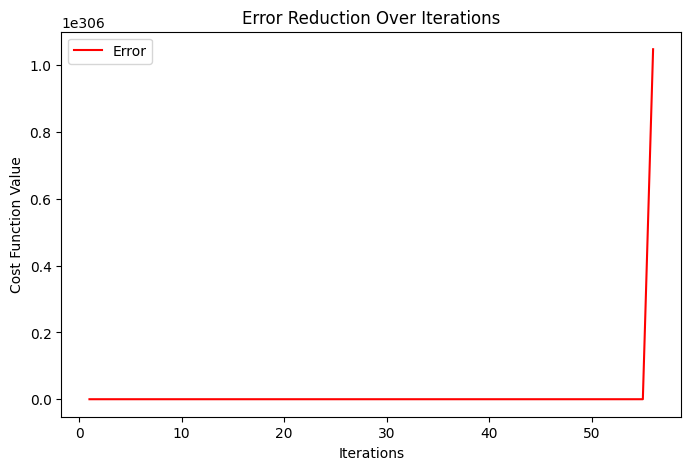

In [47]:
# Plot error reduction
t = np.arange(1, 101)
plt.figure(figsize=(8,5))
plt.plot(t, cost_hist,color="red", label='Error')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Error Reduction Over Iterations")
plt.legend()
plt.show()

<ipython-input-33-2e0aa0c0da09>:8: RuntimeWarning: overflow encountered in square
  error = np.sum((y - (m * X + b)) ** 2) / N
<ipython-input-33-2e0aa0c0da09>:18: RuntimeWarning: overflow encountered in multiply
  dm = (-2/N) * np.sum(X * (y - y_pred))
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-33-2e0aa0c0da09>:20: RuntimeWarning: invalid value encountered in scalar subtract
  m -= alpha * dm
<ipython-input-33-2e0aa0c0da09>:21: RuntimeWarning: invalid value encountered in scalar subtract
  b -= alpha * db


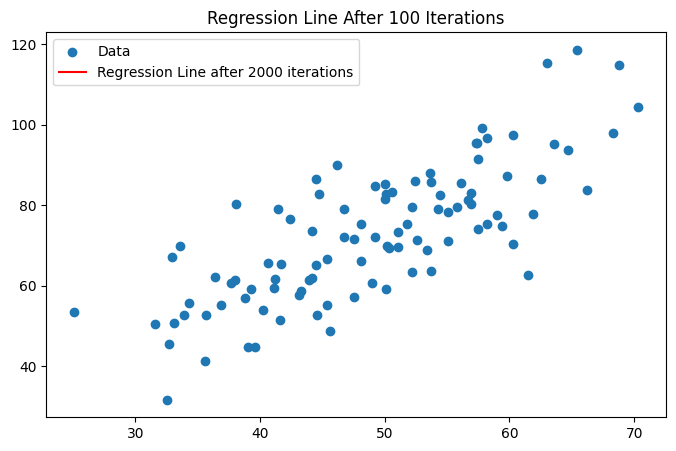

Final values: m = nan, b = nan


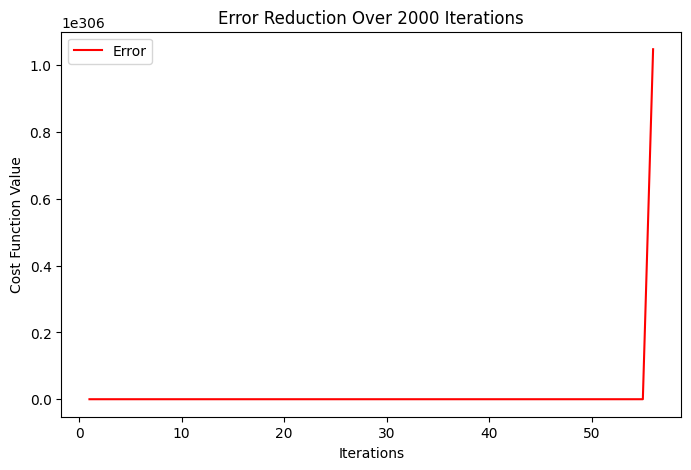

In [48]:
# Run for 2000 iterations
m_final, b_final, cost_hist = gradient_descent(X, y, m, b, alpha, 2000)

# Plot regression line after 2000 iterations
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data')
plt.plot(X, m_final * X + b_final, color='red', label='Regression Line after 2000 iterations')
plt.legend()
plt.title("Regression Line After 100 Iterations")
plt.show()

# Print final values of m, b, and alpha
print(f'Final values: m = {m_final}, b = {b_final}')

# Plot error reduction for 2000 iterations
t = np.arange(1, 2001)
plt.figure(figsize=(8,5))
plt.plot(t, cost_hist,color="red", label='Error')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Error Reduction Over 2000 Iterations")
plt.legend()
plt.show()

If you increase the learning rate αto 0.1 instead of a small value like 0.0001, the error plots will show significant changes like:

**Faster Convergence (Initially)**

A larger learning rate allows gradient descent to take bigger steps towards minimizing the cost function.
Potential Overshooting and Divergence

Instead of smoothly reducing the error, the updates jump past the minimum, causing the cost function to fluctuate and even diverge.
Error Plot Behavior

With a small learning rate (α = 0.0001), the error plot is a smooth downward curve, however with a high one the error cost value begins to rise the more iterations.
Q2: Standardization transforms the feature values to have a mean of 0 and a standard deviation of 1. This process affects linear regression in the following ways:

**Improved Numerical Stability**

Without standardization, features with large values may dominate the gradient descent updates, leading to slower or unstable convergence. Standardization ensures all features contribute equally, preventing issues due to different scales.
**Faster Convergence**

Gradient-based optimization methods (like Gradient Descent) converge more efficiently when features are standardized.
Interpretability of Coefficients

Without standardization, the coefficient (m) represents the change in y for a unit change in X, which depends on the original scale of X.
With standardization, the coefficients represent the effect of a one standard deviation change in X on y, making them easier to compare.

### Question 2

Standardization transforms the feature values to have a mean of 0 and a standard deviation of 1. This process affects linear regression in the following ways:

**Improved Numerical Stability**
Without standardization, features with large values may dominate the gradient descent updates, leading to slower or unstable convergence. Standardization ensures all features contribute equally, preventing issues due to different scales.

**Faster Convergence**
Gradient-based optimization methods (like Gradient Descent) converge more efficiently when features are standardized.

**Interpretability of Coefficients**
Without standardization, the coefficient (m) represents the change in y for a unit change in X, which depends on the original scale of X.
With standardization, the coefficients represent the effect of a one standard deviation change in X on y, making them easier to compare.